## Prepare and do task-level active learning pipeline
<!-- ![alt text](Task_Level_Active_Learning.png "Title") -->

### Prepare
Load the functions and metadata first

In [1]:
# Import every function we need
from utils import *
# Import the meta_data
meta_data = load_meta_data()

### First step: Initialize the Task Pool

```
Before running the pipeline, we will create a task pool for the experiments.
It will includes a init/ dir, which will store the information of first ActiveIT(TLAL -- Task-level Active Learning, which is the old name) iter info.
It will includes training tasks, remain_tasks(task_pool - train_tasks) and test/dev tasks
```

* Train Tasks: `train_tasks.txt` --> At iteration 0, will have 756(total tasks) / (10(Total Iters) + 1(Dev Tasks)) = 68 tasks
* Remain Tasks: `remain_tasks.txt` --> At iteration 0, will have 756(Task Pool) - 68(Iter:0 Train Tasks) = 688 tasks
* Test Tasks: `test_tasks.txt` --> 119(Test)+68(Dev) = 187 (Including test-test and test-dev, the results will be shown in predict_rougeL_for_test and predict_rougeL_for_dev separately)
* Dev Tasks: `dev_tasks.txt` --> Identical to `test_tasks.txt`

In [4]:
# Write All (Balance Dev CLS GEN)
# Recommend you set something for the split_name
train_task_list = [line.strip() for line in open("../natural-instructions/splits/default_dev/train_tasks.txt", "r").readlines()]
test_task_list = [line.strip() for line in open("../natural-instructions/splits/default_dev/test_tasks.txt", "r").readlines()]
write_TLAL_split(meta_data, train_task_list, test_task_list, seed = 10, chunks = 10, balance_dev_CLSGEN=True, split_name="Exp1")
write_TLAL_split(meta_data, train_task_list, test_task_list, seed = 20, chunks = 10, balance_dev_CLSGEN=True, split_name="Exp1")
write_TLAL_split(meta_data, train_task_list, test_task_list, seed = 30, chunks = 10, balance_dev_CLSGEN=True, split_name="Exp1")
write_TLAL_split(meta_data, train_task_list, test_task_list, seed = 40, chunks = 10, balance_dev_CLSGEN=True, split_name="Exp1")
write_TLAL_split(meta_data, train_task_list, test_task_list, seed = 50, chunks = 10, balance_dev_CLSGEN=True, split_name="Exp1")

Didn't create dir ../natural-instructions/splits/TLAL_Exp1_10, maybe it already exists
Didn't create dir {init_dir}, maybe it already exists
Number of total CLS tasks: 279, Number of total Gen tasks: 477
Done creating TLAL dir... Now printing the folder structure
../natural-instructions/splits/TLAL_Exp1_10
└── init
    ├── dev_tasks.txt
    ├── excluded_tasks.txt
    ├── remain_tasks.txt
    ├── test_tasks.txt
    └── train_tasks.txt

1 directory, 5 files
Didn't create dir ../natural-instructions/splits/TLAL_Exp1_20, maybe it already exists
Didn't create dir {init_dir}, maybe it already exists
Number of total CLS tasks: 279, Number of total Gen tasks: 477
Done creating TLAL dir... Now printing the folder structure
../natural-instructions/splits/TLAL_Exp1_20
└── init
    ├── dev_tasks.txt
    ├── excluded_tasks.txt
    ├── remain_tasks.txt
    ├── test_tasks.txt
    └── train_tasks.txt

1 directory, 5 files
Didn't create dir ../natural-instructions/splits/TLAL_Exp1_30, maybe it already 

### After running the experiment, get the results and plot it to curves.

2 3


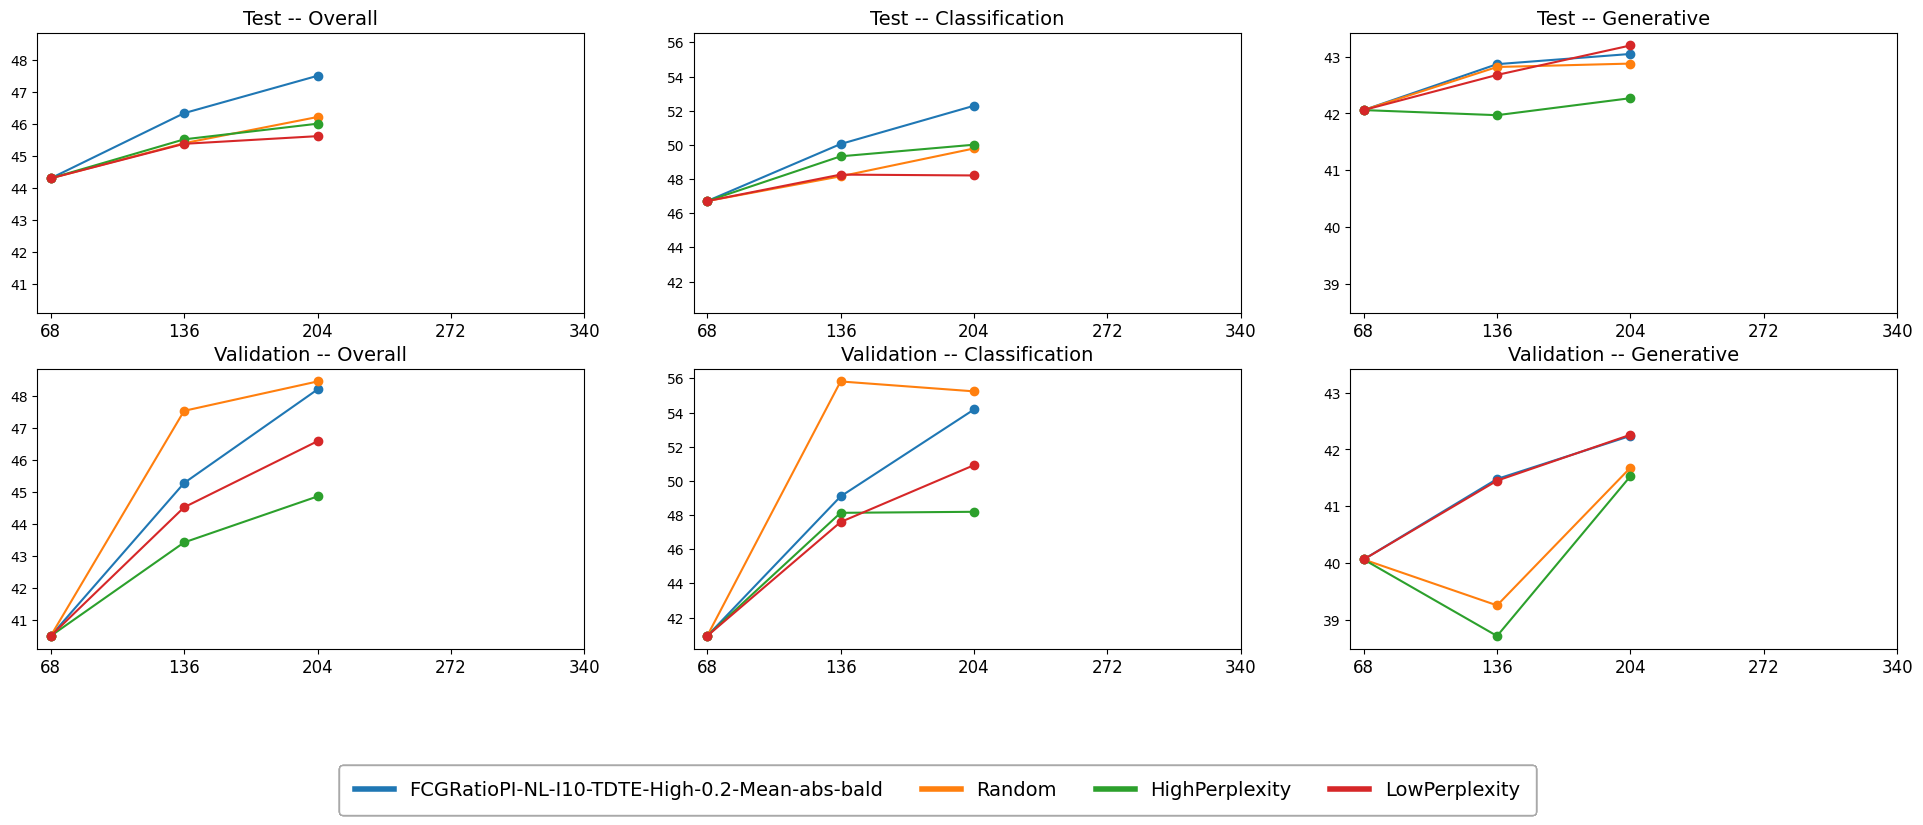

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

In [2]:
metric_list = [
    "predict_rougeL_for_test", 
    "predict_rougeL_for_test_cls", 
    "predict_rougeL_for_test_gen", 
    "predict_rougeL_for_train",
    "predict_rougeL_for_train_cls", 
    "predict_rougeL_for_train_gen"
    ]

AL_type_list = [
    # Our proposed method
    "FCGRatioPI-NL-I10-TDTE-High-0.2-Mean-abs-bald",
    "Random",
    "HighPerplexity",
    "LowPerplexity",
]
split_name_list = [
    "TLAL_Exp0_all_10",
    # "TLAL_Exp0_all_20",
    # "TLAL_Exp0_all_30",
    # "TLAL_Exp0_all_40",
    # "TLAL_Exp0_all_50",
]     
plot_AL_score(
    metric_list,
    AL_type_list,
    split_name_list,
    max_iter=5,
    plot_custom=None,
    AL_type_name = AL_type_list,
    # The directory where you store your output.
    output_dir = "output/my_experiment/TLAL"
    )

# Task Map Main Results

 50%|█████     | 1/2 [00:03<00:03,  3.18s/it]

620 382


100%|██████████| 2/2 [00:05<00:00,  2.72s/it]

552 323


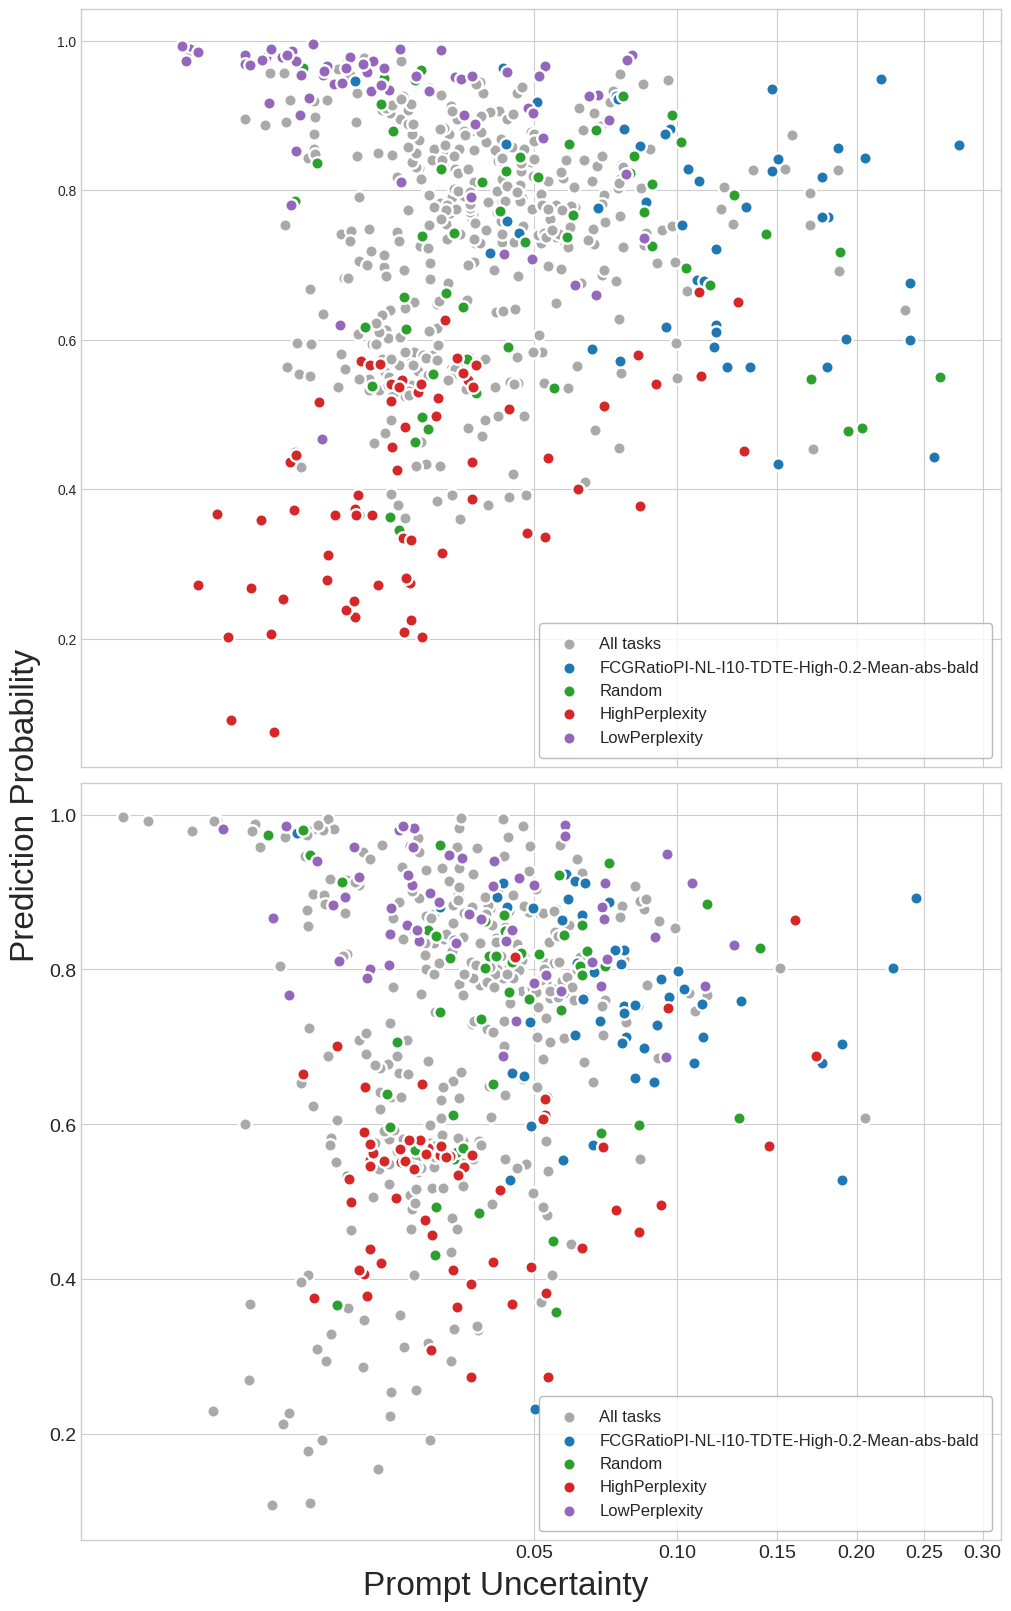

In [1]:
from taskmap import *
model_dir = "output/my_experiment/TLAL/"
# split = "TLAL_gen_10"
split = "TLAL_Exp0_all_10"
total_run = 2
# uncertainty = "FCGRatioPI-NL-I10-TDTE-High-0.2-Mean-abs-bald"

# When plotting the task map, all the prediction prob and prompt uncertainty 
# are plotted based on the first uncertainty method in this following list
# So for the 1st iter(total_run = 1), providing multiple task selection method,
# Additional Note: When you're running reproducing code, the visualization here can looks weird. (The uncertainty here are get from the newly trained model but the selected tasks are not)
# The selected tasks are from our runs, which is fixed during reproducing experiments
# Please run the task map visualization on newly trained models without --no_update_task_list args in the pipeline

AL_type_list = [
    # Our proposed method
    "FCGRatioPI-NL-I10-TDTE-High-0.2-Mean-abs-bald",
    "Random",
    "HighPerplexity",
    "LowPerplexity",
]


plot_task_map_Main(
    model_dir, 
    split, 
    AL_type_list[0], 
    total_run, 
    rank_var = False, 
    all_cls_gen = "all",
    plot_uncertainty_list = AL_type_list,
    # x_log = True
)

# Alpaca Results
```
We didn't include the file to run Active on Self-Instruct dataset in this repo.
We just take the score and plot it here.
```

In [9]:
from matplotlib.patches import Patch
# import Image
def plot_bar_graph_alpaca(
    subplot,
    print_curve_X_list, 
    print_curve_Y_list, 
    print_curve_name_list, 
    Title="", 
    XLabel="", 
    YLabel="", 
    X_MIN_MAX = None, 
    Y_MIN_MAX = None,
    ):
    # figure(figsize=(9, 6))
    cm = plt.get_cmap('tab10')
    custom_lines = []
    barwidth = 0.4
    for i, (X, Y, curve_name) in enumerate(zip(print_curve_X_list, print_curve_Y_list, print_curve_name_list)):
        try: 
            X = np.array(X) + -barwidth*0.75 + barwidth*i*0.5
            if i == 0:
                color = "darkgray"
            elif i == 1:
                color = cm(0)
            else:
                color = cm(i)
            custom_lines.append(Patch(facecolor=color, edgecolor="k", alpha=0.7) )
            subplot.bar(X, Y, color=color, width = barwidth/2, edgecolor = "k", alpha=0.7)
            if Y != [0,0,0,0,0]:
                for j, v in enumerate(Y):
                    if len(str(v)) == 1:
                        x_gap = 0.05
                    elif len(str(v)) > 2:
                        x_gap = 0.15
                    else:
                        x_gap = 0.1
                    if v >= 0:
                        subplot.text(X[j] - x_gap, v + 2, str(v))
                    else:
                        subplot.text(X[j] - x_gap, v - 5, str(v))
        except Exception as e:
            print(f"Cannot plot {curve_name} due to the error: {e}")
    # If add fully-trained score
    # subplot.axhline(y = 0, color = 'gray', linestyle = '.')
    if X_MIN_MAX is not None or Y_MIN_MAX is not None:
        # ax = plt.gca()
        subplot.set_xlim(X_MIN_MAX)
        subplot.set_ylim(Y_MIN_MAX)
    subplot.set_xticks(print_curve_X_list[0])
    subplot.set_xticklabels([1000,2000,4000,8000,16000], fontsize=12)
    return custom_lines, print_curve_name_list

def plot_bar_graph_alpaca_multiple(*args):
    plt.style.use('seaborn-v0_8-darkgrid')
    grids = [['GPT4 Evaluation', 'Chat-GPT Evaluation', 'Human Evaluation']]
    grids_flat = ['GPT4 Evaluation', 'Chat-GPT Evaluation', 'Human Evaluation']
    
    fig, axd = plt.subplot_mosaic(
        grids, 
        figsize=(16, 6),
        layout="constrained",
        sharey=True, 
        # gridspec_kw=dict(height_ratios=[1.2, 0.8], width_ratios=[1, 0.07, 1], hspace=0.1)
    )
    all_custom_lines = []
    all_print_curve_name_list = []
    for i, grid_name in enumerate(grids_flat):
        plot_args = [axd[grid_name]]+args[i]
        axd[grid_name].set_title(grids_flat[i], fontsize = 20, pad=20)
        custom_lines, all_print_curve_name_list = plot_bar_graph_alpaca(*plot_args)
        all_custom_lines += custom_lines
    legend = axd['Human Evaluation'].legend(all_custom_lines, all_print_curve_name_list, loc='upper right', ncol=1, columnspacing=1, fontsize=18, frameon=True, borderpad=0.8)
    legend.get_frame().set_alpha(1)
    legend.get_frame().set_facecolor("white")
    legend.get_frame().set_edgecolor("darkgray")
    fig.supylabel("Win Tasks - Lose Tasks", fontsize=20)
    fig.supxlabel("Number of Trainging Tasks", fontsize=20)
    fig.suptitle("Pairwise Comparison to Random Sampling (Win - Lose)", fontsize=24, y = 1.1)
    # fig.savefig("Alpaca-Results.pdf", bbox_inches='tight')
    plt.show()

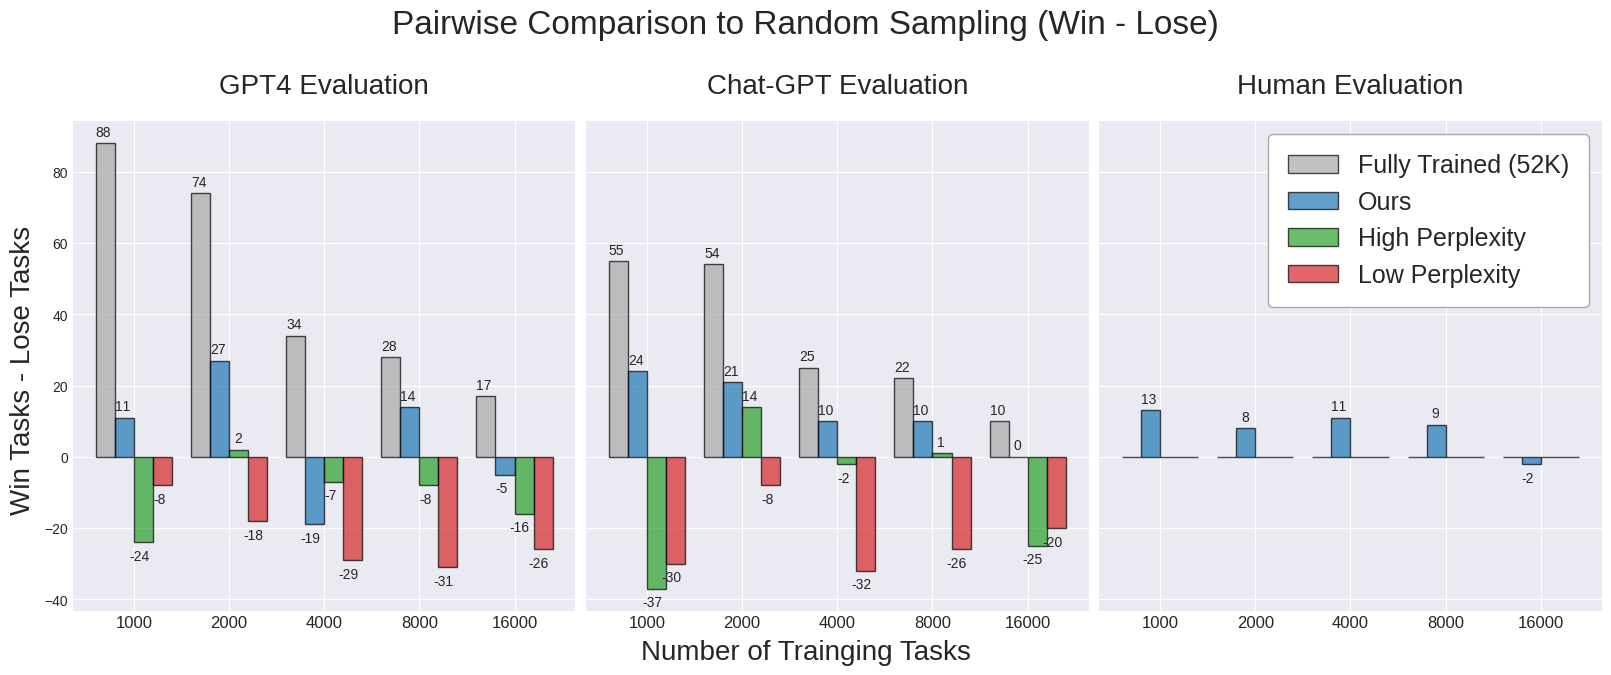

In [10]:
all_args = []
all_args.append([
    [[1.2, 2.2, 3.2, 4.2, 5.2]] * 4,
    [
        [88, 74, 34, 28, 17],
        [11, 27, -19, 14, -5],
        [-24, 2, -7, -8, -16],
        [-8, -18, -29, -31, -26]
    ],
    ['Fully Trained (52K)', 'Ours', 'High Perplexity', 'Low Perplexity'],
])
all_args.append([
    [[1.2, 2.2, 3.2, 4.2, 5.2]] * 4,
    [
        [55,54,25,22,10],
        [24,21,10,10,0],
        [-37,14,-2,1,-25],
        [-30,-8,-32,-26,-20],    
    ],
    ['Fully Trained (52K)', 'Ours', 'High Perplexity', 'Low Perplexity'],
])
all_args.append([
    [[1.2, 2.2, 3.2, 4.2, 5.2]]* 4,
    [
        [0, 0, 0, 0, 0],
        [13, 8, 11, 9, -2],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    ['Fully Trained (52K)', 'Ours', 'High Perplexity', 'Low Perplexity'],
])
plot_bar_graph_alpaca_multiple(*all_args)